In [3]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cobra

In [4]:
#Modelo y datos que podrian ser utilizados
model = cobra.io.read_sbml_model("../../recon3d_6rx.xml")
mat = scipy.io.loadmat('/home/bguzman/jupyter/UI/fba/supplementary_software_code.mat')
acetlevel=mat["acetlevellistval"] #acetlevellistval lista de valores de acetilacion

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [5]:
#Archivos que contienen las predicciones realizazdas por el modelo Pheflux
A549= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/A549_LUNG_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HCT116= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HCT116_LARGE_INTESTINE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HL60= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solved_To_Acceptable_Level.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
MCF7= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/MCF7_BREAST_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
MDAMB231= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_L15/MDAMB231_BREAST_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
NB4= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/NB4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
PANC1= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/PANC1_PANCREAS_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
PC3= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/PC3_PROSTATE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
SAOS2= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/SAOS2_BONE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
SW480= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_L15/SW480_LARGE_INTESTINE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U2OS= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U2OS_BONE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U251MG= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U251MG_CENTRAL_NERVOUS_SYSTEM_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
U937= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()
HUH7= pd.read_csv("/home/bguzman/jupyter/UI/pheflux/results/recon3d_6rx_mediums/HUH7_LIVER_Solve_Succeeded.csv", sep="\t", lineterminator='\n', squeeze=True).to_dict()


In [6]:
#Contruir listas para poder recorrerlas
lista_csv=[A549,HCT116,HL60,HUH7,MCF7,MDAMB231,NB4,PANC1,PC3,SAOS2,SW480,U251MG,U2OS,U937] #contiene archivos
lista_line=["A549","HCT116","HL60","HUH7","MCF7","MDAMB231","NB4","PANC1","PC3","SAOS2","SW480","U251MG","U2OS","U937"] #contiene nombres de lineas

In [9]:
#Primero construimos la sumatoria de todos los flujos predichos
lista_vi=[]
#Recorrer cada archivo 
for name_csv in lista_csv:
    sum_fluxes=0 #Inicializar sumatoria por cada linea celular
    for valor in name_csv["0"].values(): #Recorrer valores de cada flujo predicho
        sum_fluxes+=abs(valor) #sumatoria en valor absoluto para cada linea
        
    lista_vi.append(sum_fluxes)
        
print(lista_vi)           

[217.31811134976843, 222.46583687102807, 194.20334463506285, 225.59338772739906, 219.89586751255936, 213.10555744941695, 211.04699031037842, 204.9533274016518, 207.06937994563486, 215.89457388173722, 208.9599919419996, 209.11844507269464, 208.98307558590636, 195.80945123465855]


In [10]:
#Determinar el alfa para cada linea celular predicha
alfa=[]

for i in lista_vi:     
    alfa.append(1/i)
     
print(alfa)


[0.004601549285464401, 0.004495072205534812, 0.005149241903527201, 0.004432754036250269, 0.0045476070619784835, 0.0046925101905770875, 0.004738281263946668, 0.004879159624670434, 0.004829299243869593, 0.004631890380662277, 0.004785605085003865, 0.004781978938550235, 0.004785076481415508, 0.005107005783911816]


In [11]:
#Multiplizar los alfas  por el vector de reacciones 
def multiplicar_vector(lista,alfa):
    lista_vacia=[]
    for numero in lista:
        lista_vacia.append(numero*alfa)
    return lista_vacia



dicc_all={}
j=0
for name in lista_csv:
    all_fluxes=[]
    for i in name["0"]:
        all_fluxes.append(name["0"][i])
    dicc_all[lista_line[j]]=all_fluxes
    j+=1
        #for flux in range (len(lista_csv)):
            #all_fluxes.append(lista_csv[flux])


dicc_all_new={} 
pos=0
for i,k in dicc_all.items():
        dicc_all_new[lista_line[pos]]=multiplicar_vector(k,alfa[pos])
        pos+=1
#Multiplicar alfa por EX_glc_D_e
for l,p in dicc_all_new.items():
    flux_glu= p[5058]
    print(flux_glu)

0.0006325048127017764
0.0007949330843956193
0.0009384398680194283
0.0006121318259191226
0.0009263991824176157
0.0007495454760566583
0.0006936493041312597
0.0005226277073739858
0.0006647987101846509
0.0006921866215286901
0.0007669473745322722
0.0006585664992981628
0.0004982045336712374
0.0005747988069898165


In [13]:
#Multiplicar alfa por EX_PAC y guardarlo en una lista para llamarlo en el eje x
flux_PAC_total=[]
for l,p in dicc_all_new.items():
    flux_PAC_total.append(p[10604])
print(flux_PAC_total)

[0.00027175476851344985, 0.000245198762424768, 0.00024505896912500755, 0.00028643838939786586, 0.00023441831639904544, 0.00029397251865685275, 0.0002524458917478019, 0.00031697096471266763, 0.00029770094934363644, 0.000295331800150721, 0.00028030662646978384, 0.0002999832664824762, 0.00020842837493454278, 0.00029069247894519324]


Coef. Pearson:
(0.4634352657986276, 0.09511935551216422)


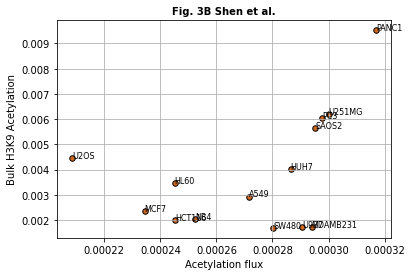

In [14]:
#grafico EX_PAC*alfa
from scipy import stats
x=flux_PAC_total
y=acetlevel[0,:]


plt.scatter(x,y,color="chocolate",edgecolors='black',s=30)
plt.title('Fig. 3B Shen et al.',fontsize = 10,fontweight = "bold")
plt.xlabel('Acetylation flux')
plt.ylabel('Bulk H3K9 Acetylation')

r=stats.pearsonr(x, y)

print("Coef. Pearson:")
print(r)

for i in range(14):
    plt.text(x[i],y[i],lista_line[i],fontsize = 8)
    
plt.grid()
plt.show()